## 1. Einleitung / Ziel des Projekts ✈️

In diesem Projekt analysieren wir **Flugverspätungen und Annullierungen** im Zeitraum 2009-2023.  
Besonders interessieren uns **die Zusammenhänge zwischen Airline, Flugdauer, Datum und Verspätung**.

**Fragestellungen:**
- **Welche Airlines sind am häufigsten verspätet?**
- **Gibt es Zusammenhänge zwischen Flugdauer und Verspätung?**
- **Welche Monate oder Flughäfen sind besonders problematisch?**


## 2. Daten laden und Überblick 🧐

Wir laden die Stichprobe der Flugdaten (`flights_sample_3m.csv`)  
und verschaffen uns einen ersten Überblick:
- **Wie viele Zeilen und Spalten gibt es?**
- **Welche Spalten sind enthalten?**
- **Gibt es fehlende Werte?**


In [1]:
import pandas as pd

# Daten laden
df = pd.read_csv("../data/flights_sample_3m.csv")

# Ersten Blick auf die Daten werfen
df.head()


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


## 3. Erste Datenprüfung 🧪

Ziel:
- **Größe des Datensatzes ermitteln**
- **Spaltennamen und Datentypen prüfen**
- **Fehlende Werte identifizieren**


In [2]:
# Größe des Datensatzes
df.shape

# Spaltennamen anzeigen
df.columns

# Datentypen und Speicherverbrauch prüfen
df.info()

# Fehlende Werte prüfen
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

## 4. Daten bereinigen 🧹

Da unser Fokus auf Verspätungen liegt, filtern wir die Daten:
- **Nur relevante Spalten behalten**.
- **Nur Flüge berücksichtigen, die nicht gecancelled wurden**.
- **NaN-Werte in `DEP_DELAY`, `ARR_DELAY` entfernen**.


In [3]:
# Nur die relevanten Spalten auswählen
df_reduced = df[['FL_DATE', 'AIRLINE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'ELAPSED_TIME']]

# Nur Flüge behalten, die nicht gecancelled wurden (CANCELLED == 0)
df_reduced = df_reduced[df_reduced['CANCELLED'] == 0]

# Fehlende Werte entfernen (vor allem DEP_DELAY, ARR_DELAY)
df_cleaned = df_reduced.dropna(subset=['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME'])

# Ersten Blick auf die bereinigten Daten
df_cleaned.head()


,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ELAPSED_TIME
0,2019-01-09,United Air Lines Inc.,FLL,EWR,-4.0,-14.0,0.0,0.0,176.0
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,-6.0,-5.0,0.0,0.0,236.0
2,2022-07-22,United Air Lines Inc.,DEN,MSP,6.0,0.0,0.0,0.0,112.0
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,-1.0,24.0,0.0,0.0,285.0
4,2020-02-23,Spirit Air Lines,MCO,DFW,-2.0,-1.0,0.0,0.0,182.0


In [4]:
df_cleaned.shape


(2913802, 9)

##  5. Korrelationen analysieren 🔥

Wichtige Fragen: 
 - Hängt die Abflugverspätung (DEP_DELAY) mit der Ankunftsverspätung `ARR_DELAY` zusammen? → Erwartung: Ja, sehr stark!
 - Hängt die Flugdauer (`ELAPSED_TIME`) mit der Verspätung zusammen? → Sind lange Flüge öfter verspätet?

## 5.1 Korrelationen zwischen Verspätung und Flugdauer 

Wir wollen herausfinden, wie stark die Abflugverspätung (`DEP_DELAY`), die Ankunftsverspätung (`ARR_DELAY`) und die Flugdauer (`ELAPSED_TIME`) zusammenhängen.


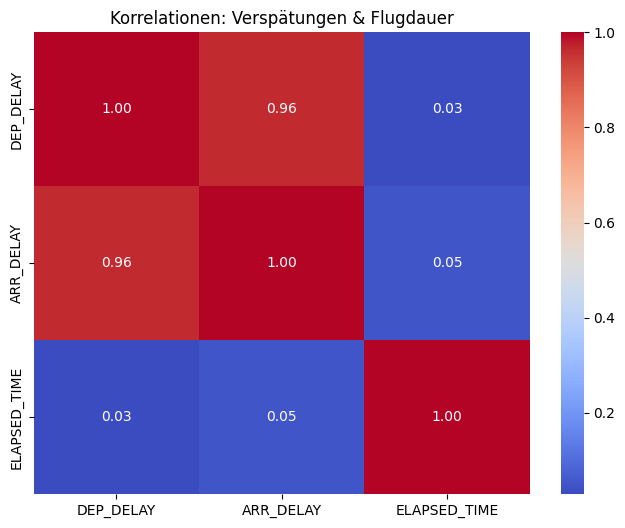

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevante numerische Spalten für Korrelation
korrelations_df = df_cleaned[['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME']]

# Korrelationsmatrix berechnen
korrelationen = korrelations_df.corr()

# Heatmap plotten
plt.figure(figsize=(8, 6))
sns.heatmap(korrelationen, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Korrelationen: Verspätungen & Flugdauer")
plt.show()


In [8]:
# Korrelationsmatrix berechnen und als Zahlen anzeigen
korrelationen = df_cleaned[['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME']].corr()
korrelationen


,DEP_DELAY,ARR_DELAY,ELAPSED_TIME
DEP_DELAY,1.000000,0.964805,0.028724
ARR_DELAY,0.964805,1.000000,0.051337
ELAPSED_TIME,0.028724,0.051337,1.000000


## 5.2 Scatterplot: Abflugverspätung vs. Ankunftsverspätung ✈️

Gibt es einen linearen Zusammenhang?  
**Wenn ein Flug verspätet startet – kommt er dann auch verspätet an?**


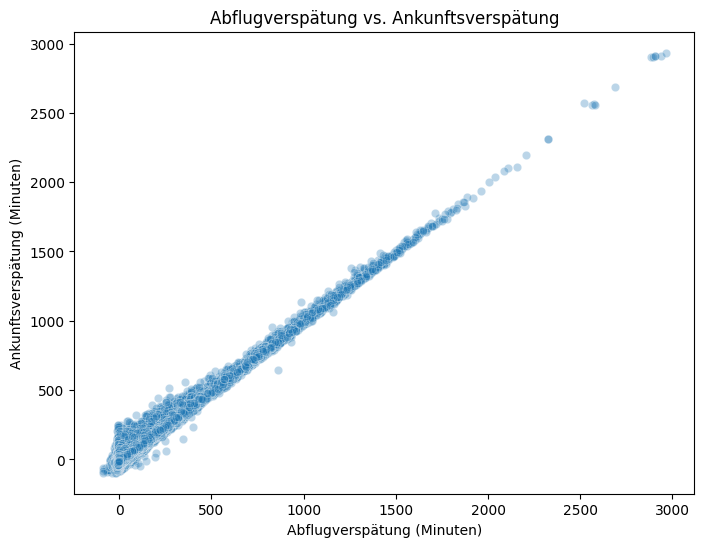

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=df_cleaned, alpha=0.3)

plt.title("Abflugverspätung vs. Ankunftsverspätung")
plt.xlabel("Abflugverspätung (Minuten)")
plt.ylabel("Ankunftsverspätung (Minuten)")

plt.show()


## 5.3 Scatterplot: Flugdauer vs. Ankunftsverspätung 🕒✈️

Werden längere Flüge häufiger verspätet?  
Oder haben kurze Flüge auch hohe Verspätungen?


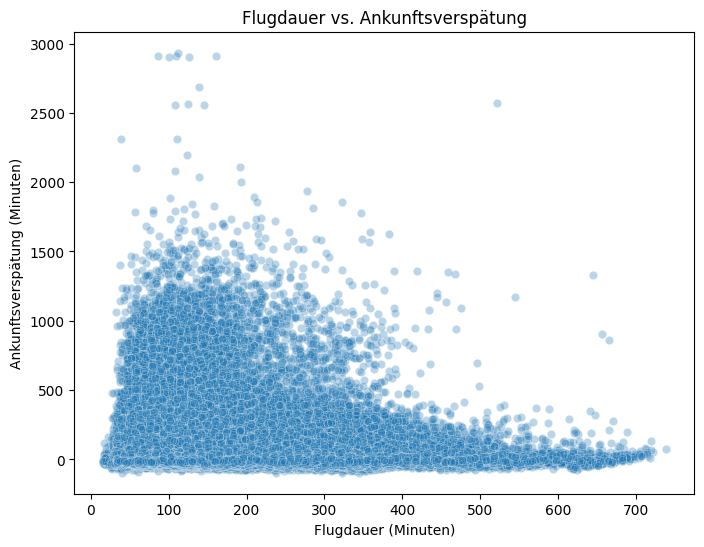

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ELAPSED_TIME', y='ARR_DELAY', data=df_cleaned, alpha=0.3)

plt.title("Flugdauer vs. Ankunftsverspätung")
plt.xlabel("Flugdauer (Minuten)")
plt.ylabel("Ankunftsverspätung (Minuten)")

plt.show()


## 5.4 Interpretation der Korrelationen 🧠

### 🔸 Abflugverspätung vs. Ankunftsverspätung (0.96):
- **Sehr starker Zusammenhang**:  
  **Wenn der Flug verspätet startet → fast immer auch verspätete Ankunft**.

### 🔸 Abflugverspätung vs. Flugdauer (0.03):
- **Kein Zusammenhang**:  
  **Die Flugdauer hat keinen Einfluss auf die Abflugverspätung**.

### 🔸 Ankunftsverspätung vs. Flugdauer (0.05):
- **Sehr schwacher Zusammenhang**:  
  **Längere Flüge minimal häufiger verspätet – aber fast kein Effekt**.
